# # Predicción de Precios de Viviendas
# **Objetivo:** Predecir el precio de una casa basándose en su área (m²)
## 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ Libraries loaded")


✓ Libraries loaded


## 2. Load Dataset

In [ ]:
data = pd.read_csv('C:/Users/nikka/Downloads/PRIMER ML/data/housing_data.csv')

print(f"Dataset shape: {data.shape}")
print(f"\nFirst 5 rows:")
data.head()

# %%
# Información del dataset
print("Dataset info:")
data.info()

print("\nStatistical summary:")
data.describe()

Dataset shape: (49, 2)

First 5 rows:
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   area_m2  49 non-null     int64
 1   price    49 non-null     int64
dtypes: int64(2)
memory usage: 916.0 bytes

Statistical summary:


,area_m2,price
count,49.000000,49.000000
mean,112.897959,236816.326531
std,46.723141,100910.990785
min,45.000000,88000.000000
25%,74.000000,154000.000000
50%,102.000000,220000.000000
75%,145.000000,300000.000000
max,210.000000,450000.000000


## 3. Exploratory Data Analysis (EDA)
# Visualizar distribuciones

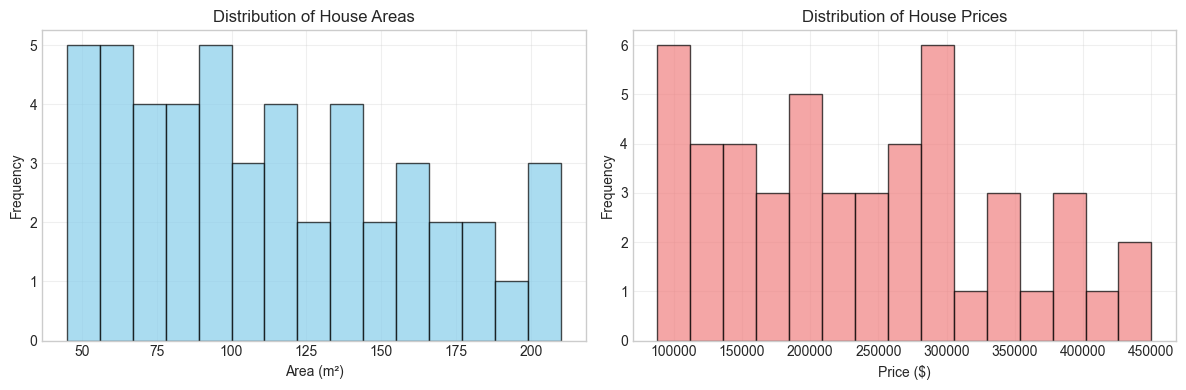

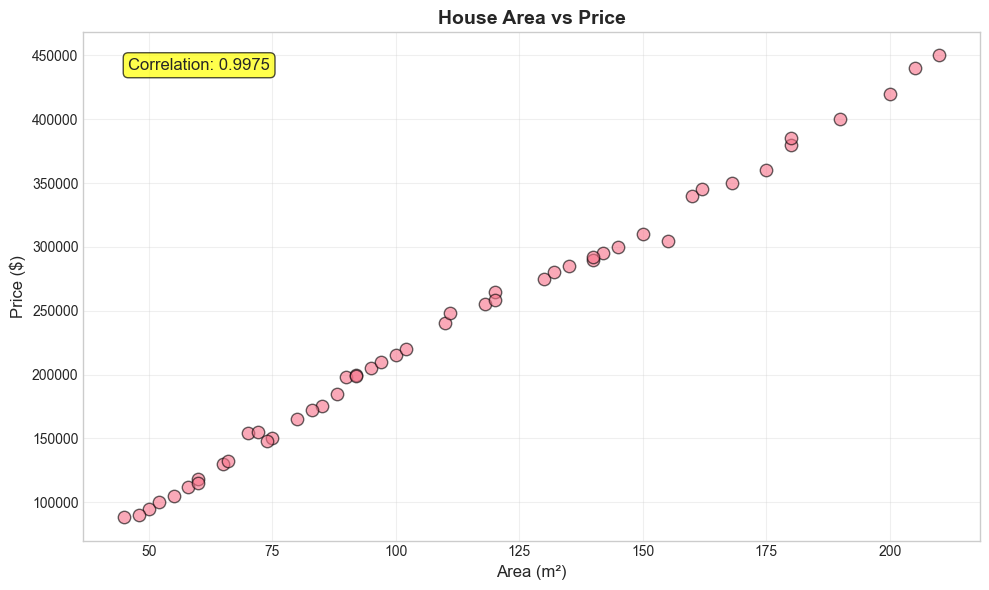

Correlation between area and price: 0.9975


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribución de áreas
axes[0].hist(data['area_m2'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Area (m²)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Areas')
axes[0].grid(True, alpha=0.3)

# Distribución de precios
axes[1].hist(data['price'], bins=15, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of House Prices')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Scatter plot: Area vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['area_m2'], data['price'], alpha=0.6, s=80, edgecolors='k')
plt.xlabel('Area (m²)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('House Area vs Price', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Calcular correlación
correlation = data['area_m2'].corr(data['price'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', 
         facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Correlation between area and price: {correlation:.4f}")


## 4. Prepare Data

In [ ]:
# Separate features and target
x = data.drop('price', axis=1)
y = data['price']

print(f"Features (X): {x.shape}")
print(f"Target (y): {y.shape}")

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(x_train)} ({(len(x_train)/len(x))*100:.0f}%)")
print(f"Test samples: {len(x_test)} ({(len(x_test)/len(x))*100:.0f}%)")



Features (X): (49, 1)
Target (y): (49,)
Training samples: 39 (80%)
Test samples: 10 (20%)


## 5. Train Model
# Entrenar modelo de regresión lineal

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print("="*60)
print("MODEL TRAINED!")
print("="*60)
print(f"\nEquation: Price = {slope:.2f} × Area + {intercept:.2f}")
print(f"\nInterpretation:")
print(f"  • Each m² adds ${slope:,.2f} to the price")
print(f"  • Base price: ${intercept:,.2f}")

MODEL TRAINED!

Equation: Price = 2138.42 × Area + -4293.29

Interpretation:
  • Each m² adds $2,138.42 to the price
  • Base price: $-4,293.29


## 6. Make Predictions
# Predict on test set

In [ ]:
y_pred = model.predict(x_test)

print("Sample predictions:")
print(y_pred[:5])

Sample predictions:
[134703.81105602 192441.06996486 295085.0858028  136842.22805264
 209548.40593785]


## 7. Evaluate Model
# Calcular métricas

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*60)
print("PERFORMANCE METRICS")
print("="*60)
print(f"Mean Squared Error (MSE):  ${mse:,.2f}")
print(f"Root Mean Squared Error:   ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score:                  {r2:.4f} ({r2*100:.2f}%)")
print("="*60)

print(f"\nInterpretation:")
print(f"  • Model explains {r2*100:.1f}% of price variance")
print(f"  • Average error: ±${mae:,.0f}")

PERFORMANCE METRICS
Mean Squared Error (MSE):  $36,810,525.63
Root Mean Squared Error:   $6,067.17
Mean Absolute Error (MAE): $5,733.72
R² Score:                  0.9932 (99.32%)

Interpretation:
  • Model explains 99.3% of price variance
  • Average error: ±$5,734


## 8. Visualizations
# Crear dashboard de evaluación

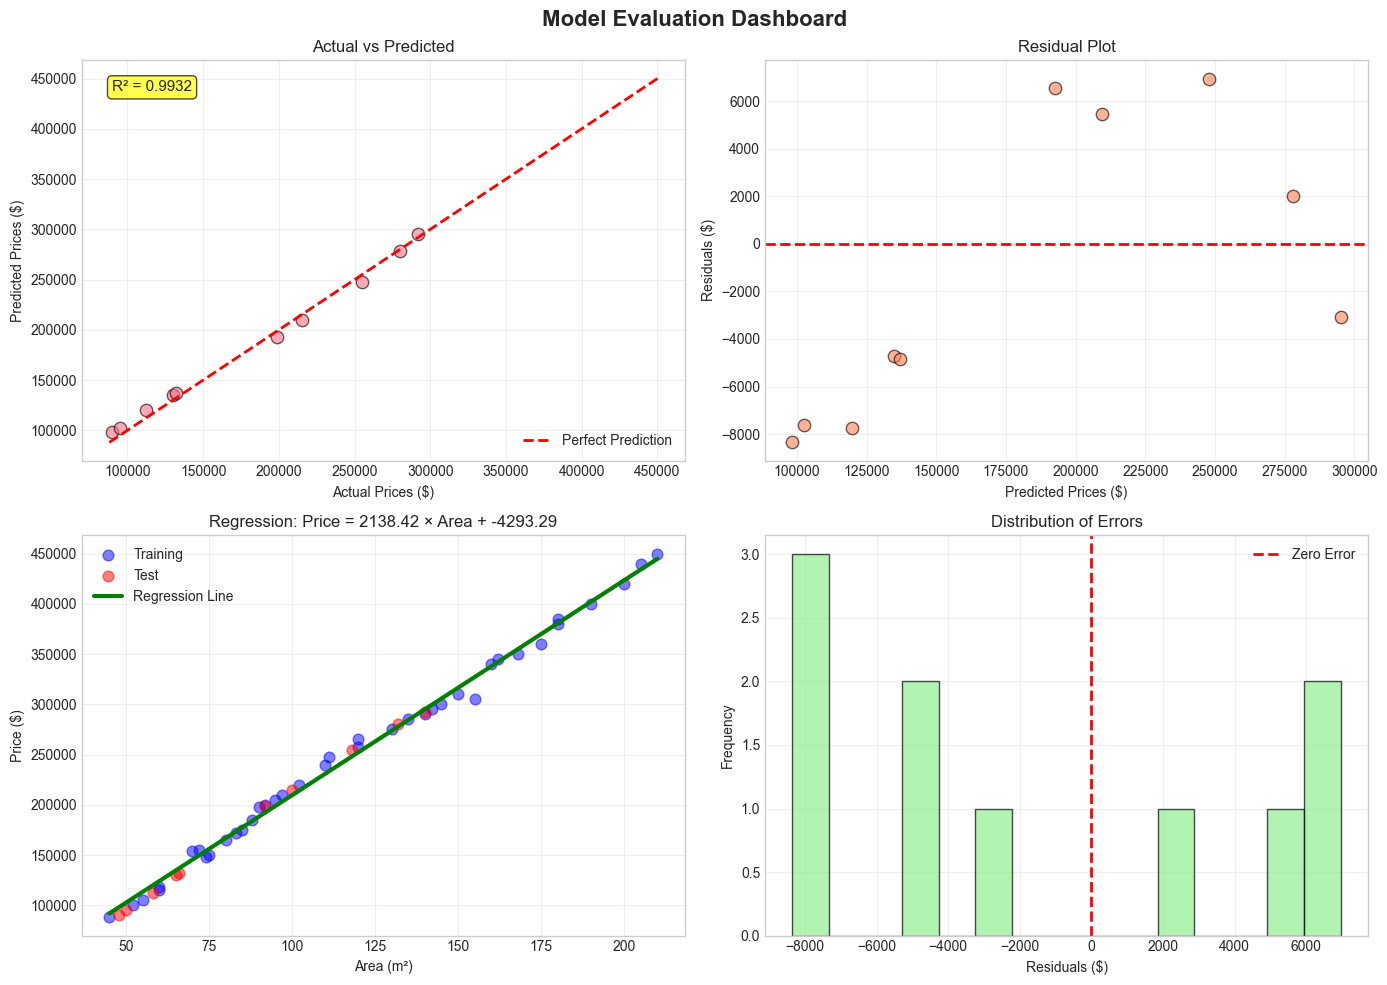

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation Dashboard', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, s=80, edgecolors='k')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Prices ($)')
axes[0, 0].set_ylabel('Predicted Prices ($)')
axes[0, 0].set_title('Actual vs Predicted')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, f'R² = {r2:.4f}', 
                transform=axes[0, 0].transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', 
                facecolor='yellow', alpha=0.7))

# 2. Residuals plot
residuals = y_test.values - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, s=80, edgecolors='k', color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Prices ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Regression line
axes[1, 0].scatter(x_train, y_train, alpha=0.5, s=60, color='blue', label='Training')
axes[1, 0].scatter(x_test, y_test, alpha=0.5, s=60, color='red', label='Test')
x_range = np.linspace(x['area_m2'].min(), x['area_m2'].max(), 100)
y_range = slope * x_range + intercept
axes[1, 0].plot(x_range, y_range, 'g-', linewidth=3, label='Regression Line')
axes[1, 0].set_xlabel('Area (m²)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title(f'Regression: Price = {slope:.2f} × Area + {intercept:.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Error distribution
axes[1, 1].hist(residuals, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 1].set_xlabel('Residuals ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Errors')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 9. Analyze Predictions
# Cargar predicciones guardadas

In [20]:
predictions = pd.read_csv(r"C:\Users\nikka\Downloads\PRIMER ML\predictions\full_predictions.csv")


print("Predictions loaded:")
predictions

# %%
# Estadísticas de errores
print("="*60)
print("ERROR STATISTICS")
print("="*60)
print(f"Mean error:           ${predictions['Error'].mean():,.2f}")
print(f"Mean absolute error:  ${predictions['Absolute_Error'].mean():,.2f}")
print(f"Max error:            ${predictions['Absolute_Error'].max():,.2f}")
print(f"Min error:            ${predictions['Absolute_Error'].min():,.2f}")
print(f"Std error:            ${predictions['Absolute_Error'].std():,.2f}")

# %%
# Top 5 peores predicciones
print("\n5 WORST PREDICTIONS:")
predictions.nlargest(5, 'Absolute_Error')[['Area_m2', 'Actual_Price', 
                                             'Predicted_Price', 'Absolute_Error']]

# %%
# Top 5 mejores predicciones
print("\n5 BEST PREDICTIONS:")
predictions.nsmallest(5, 'Absolute_Error')[['Area_m2', 'Actual_Price', 
                                              'Predicted_Price', 'Absolute_Error']]

Predictions loaded:
ERROR STATISTICS
Mean error:           $-1,535.14
Mean absolute error:  $5,733.72
Max error:            $8,350.72
Min error:            $2,022.25
Std error:            $2,090.99

5 WORST PREDICTIONS:

5 BEST PREDICTIONS:


,Area_m2,Actual_Price,Predicted_Price,Absolute_Error
6,132,280000,277977.749830,2022.250170
2,140,292000,295085.085803,3085.085803
0,65,130000,134703.811056,4703.811056
3,66,132000,136842.228053,4842.228053
4,100,215000,209548.405938,5451.594062


## 10. Make Custom Predictions
# Función para predecir precios

In [21]:
def predict_price(area_m2):
    """Predice el precio de una casa dado su área"""
    prediction = model.predict([[area_m2]])[0]
    print(f"\nHouse Area: {area_m2} m²")
    print(f"Predicted Price: ${prediction:,.2f}")
    return prediction

# Ejemplos
print("EXAMPLE PREDICTIONS:")
predict_price(80)
predict_price(120)
predict_price(180)

EXAMPLE PREDICTIONS:

House Area: 80 m²
Predicted Price: $166,780.07

House Area: 120 m²
Predicted Price: $252,316.75

House Area: 180 m²
Predicted Price: $380,621.77


C:\Users\nikka\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nikka\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nikka\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(380621.76566774456)

## 11. Save Model
# Guardar modelo entrenado

In [23]:
joblib.dump(model, r'C:\Users\nikka\Downloads\PRIMER ML\model\linear_regression_model.pkl')
print("✓ Model saved to: model/linear_regression_model.pkl")

# Para cargar después:
# loaded_model = joblib.load('model/linear_regression_model.pkl')

✓ Model saved to: model/linear_regression_model.pkl


## 12. Summary

In [24]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"✓ Dataset: {len(data)} houses")
print(f"✓ Model: Linear Regression")
print(f"✓ Equation: Price = {slope:.2f} × Area + {intercept:.2f}")
print(f"✓ R²: {r2:.4f} ({r2*100:.1f}%)")
print(f"✓ RMSE: ${rmse:,.2f}")
print(f"✓ MAE: ${mae:,.2f}")
print("="*60)

print("\n📚 Key Learnings:")
print("  • Strong correlation between area and price")
print(f"  • Each m² adds ~${slope:,.0f} to the price")
print(f"  • Model is {'excellent' if r2 > 0.9 else 'good' if r2 > 0.7 else 'moderate'}")
print("  • Ready to apply to more complex datasets!")


PROJECT SUMMARY
✓ Dataset: 49 houses
✓ Model: Linear Regression
✓ Equation: Price = 2138.42 × Area + -4293.29
✓ R²: 0.9932 (99.3%)
✓ RMSE: $6,067.17
✓ MAE: $5,733.72

📚 Key Learnings:
  • Strong correlation between area and price
  • Each m² adds ~$2,138 to the price
  • Model is excellent
  • Ready to apply to more complex datasets!
